In [1]:
from plotnine import *
from plotnine.data import *
from vega_datasets import data

In [2]:
d = data.gapminder()
data = d[d['country'].isin(['Turkey', 'Spain', 'Mexico'])]

In [3]:
data.head()

,year,country,cluster,pop,life_expect,fertility
484,1955,Mexico,3,32929914,55.190,6.8000
485,1960,Mexico,3,38578505,58.299,6.7495
486,1965,Mexico,3,45142399,60.110,6.7495
487,1970,Mexico,3,52775158,62.361,6.5000
488,1975,Mexico,3,60678045,65.032,5.2505


C:\Users\Никита\AppData\Local\Temp\ipykernel_21144\2334369549.py:20: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


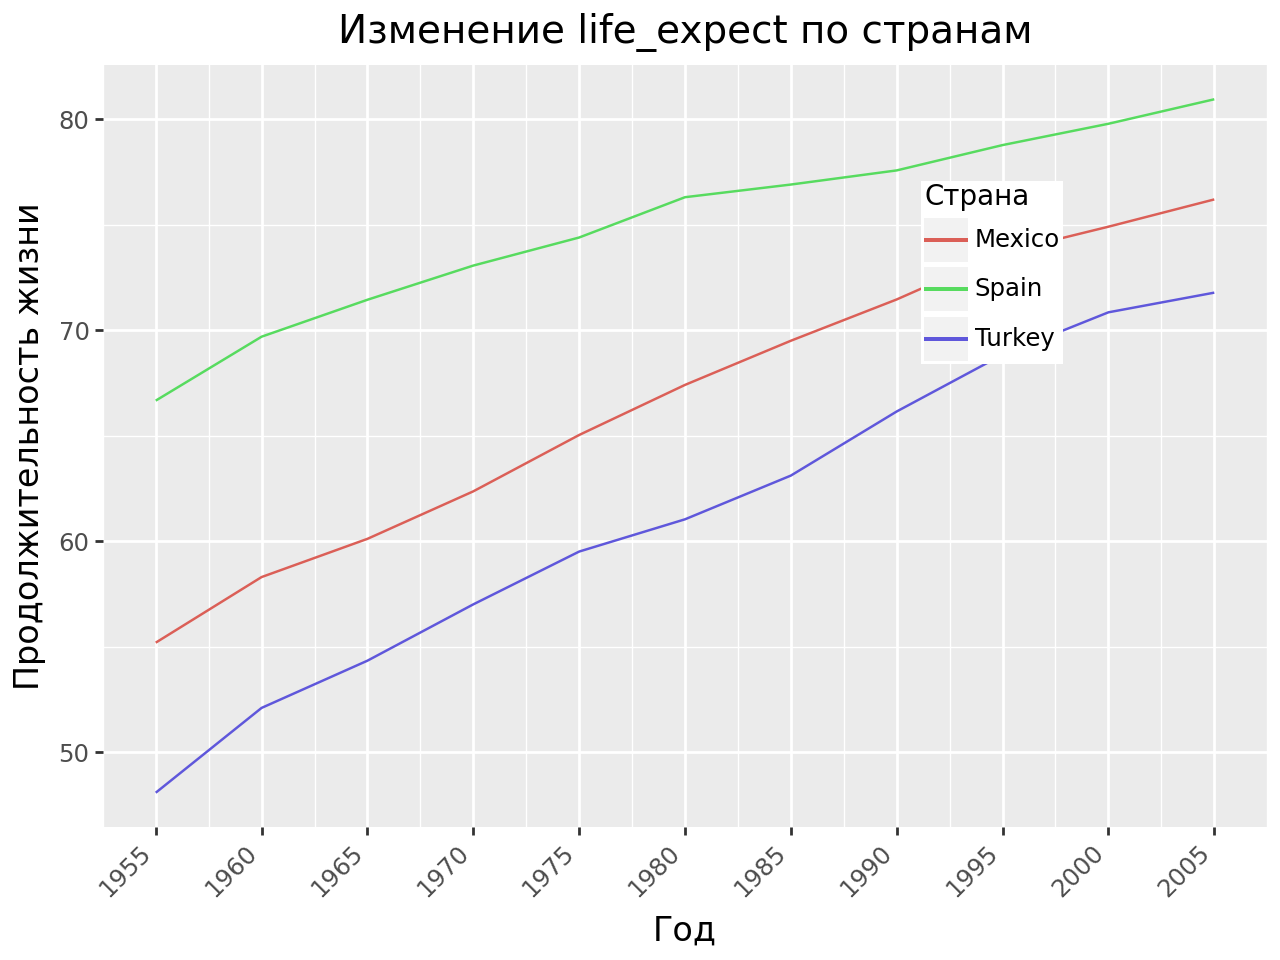

In [9]:
plot = (
    ggplot(data, aes(x='year', y='life_expect', color='country')) +
    geom_line() +
    labs(
        title='Изменение life_expect по странам',
        x='Год',
        y='Продолжительность жизни',
        color='Страна'
    ) +
    theme(
        plot_title=element_text(size=14, ha='center'),
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        axis_text_x=element_text(rotation=45, hjust=1),
        legend_title=element_text(size=10),
        legend_position=(0.8, 0.8)  # Пример позиции легенды (можно настроить)
    ) +
    scale_x_continuous(breaks=data['year'].unique())  # Уникальные значения года
)
print(plot)

C:\Users\Никита\AppData\Local\Temp\ipykernel_21144\913755652.py:25: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


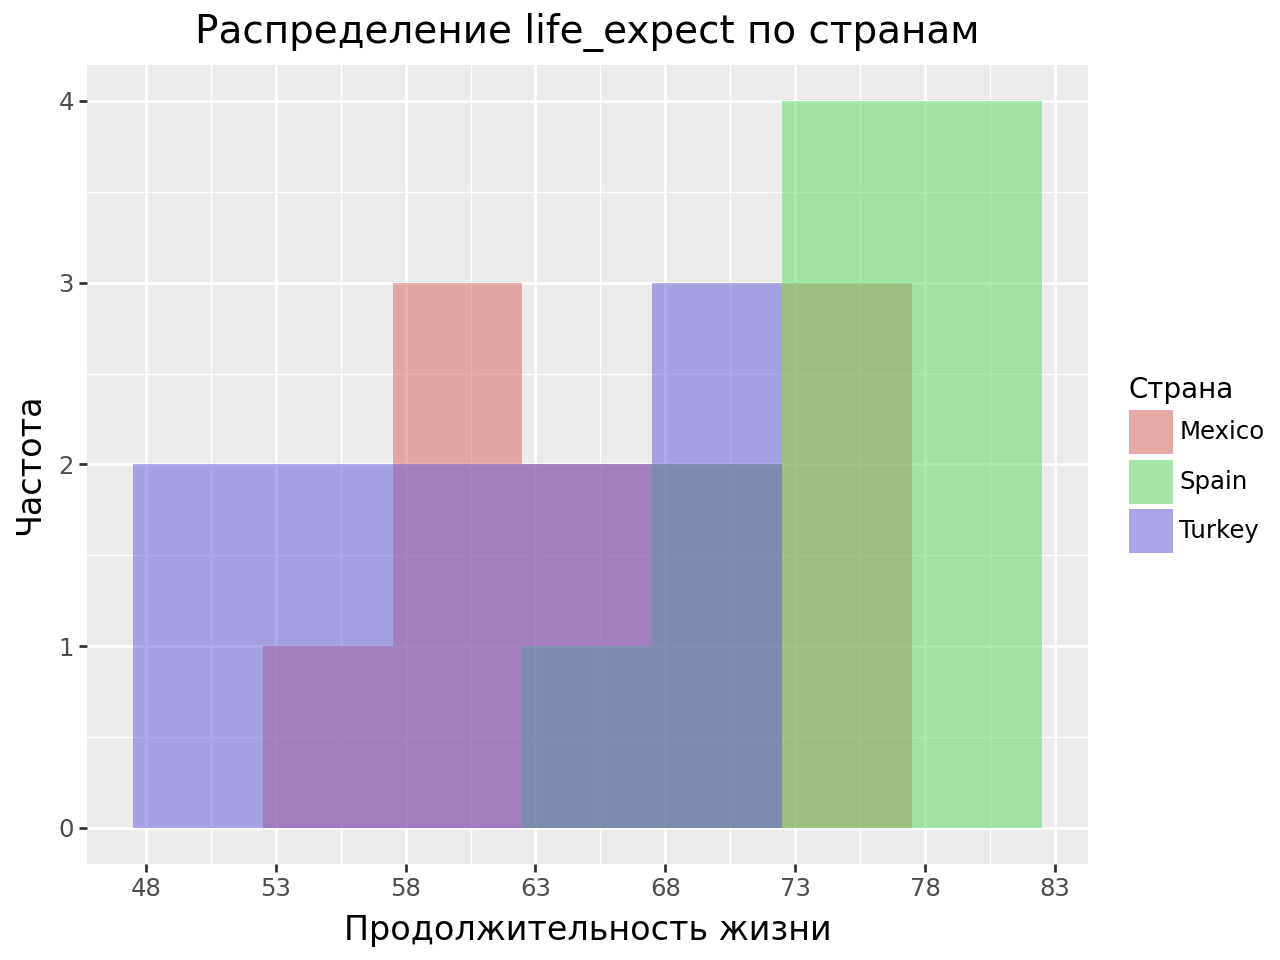

In [22]:
bins = range(int(data['life_expect'].min()), int(data['life_expect'].max()) + 5, 5)

plot = (
    ggplot(data, aes(x='life_expect', fill='country')) +
    geom_histogram(
        binwidth=5,
        alpha=0.5,
        position='identity',
    ) +
    labs(
        title='Распределение life_expect по странам',
        x='Продолжительность жизни',
        y='Частота',
        fill='Страна'
    ) +
    theme(
        plot_title=element_text(size=14, ha='center'),
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        legend_title=element_text(size=10),
        legend_position='right',
    ) +
    scale_x_continuous(breaks=bins)
)
print(plot)

C:\Users\Никита\AppData\Local\Temp\ipykernel_21144\3862701875.py:22: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


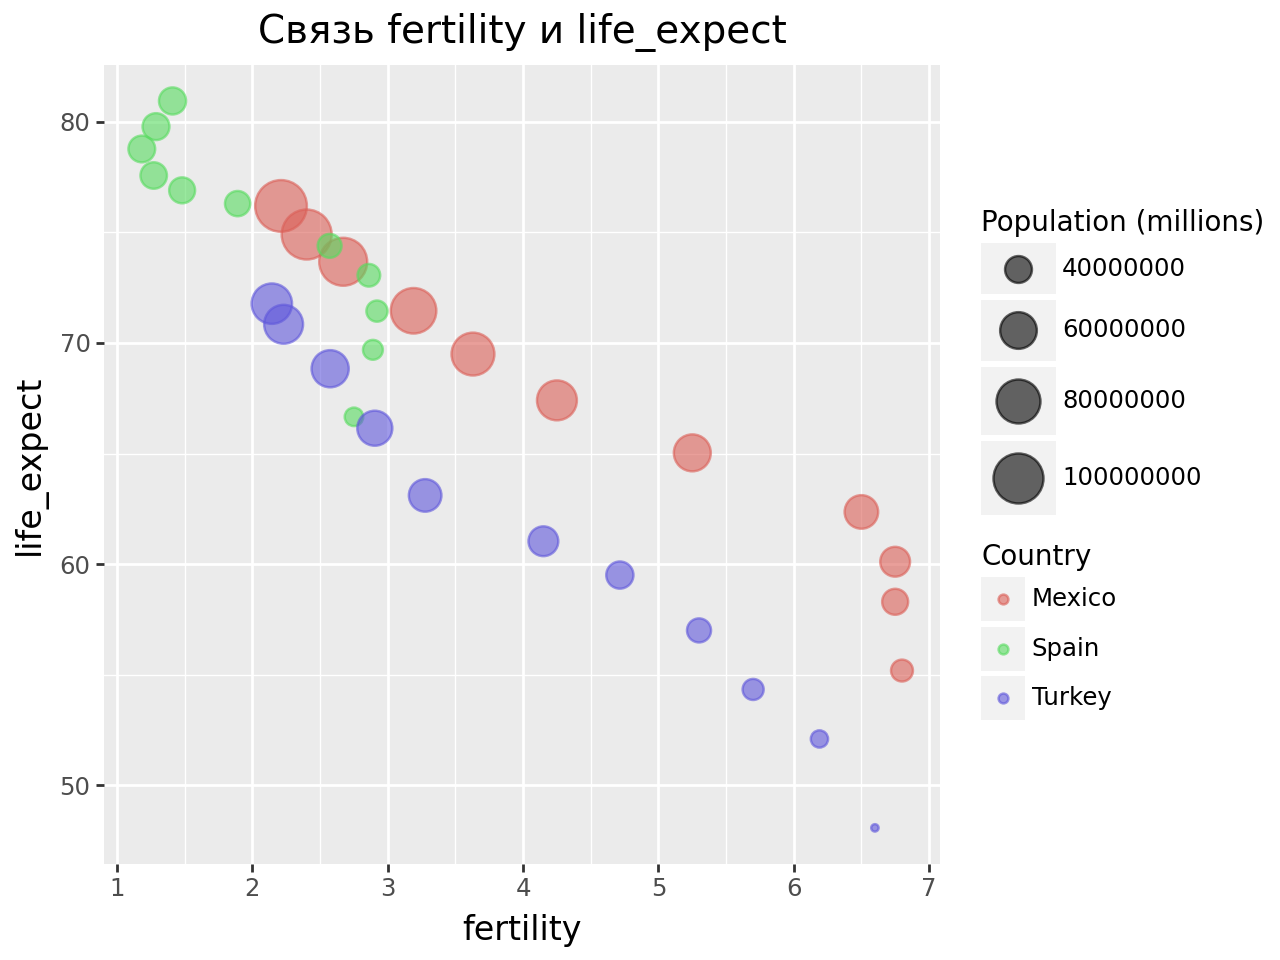

In [11]:
plot = (
    ggplot(data, aes(x='fertility', y='life_expect', size='pop', color='country')) +
    geom_point(alpha=0.6, stroke=0.5) +
    labs(
        title='Связь fertility и life_expect',
        x='fertility',
        y='life_expect',
        size='Population (millions)',
        color='Country'
    ) +
    theme(
        plot_title=element_text(size=14, ha='center'),
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        legend_title=element_text(size=10),
        legend_position='right',
        legend_box='vertical'
    ) +
    scale_size_continuous(range=(1, 10))
)

print(plot)

C:\Users\Никита\AppData\Local\Temp\ipykernel_21144\941107237.py:19: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


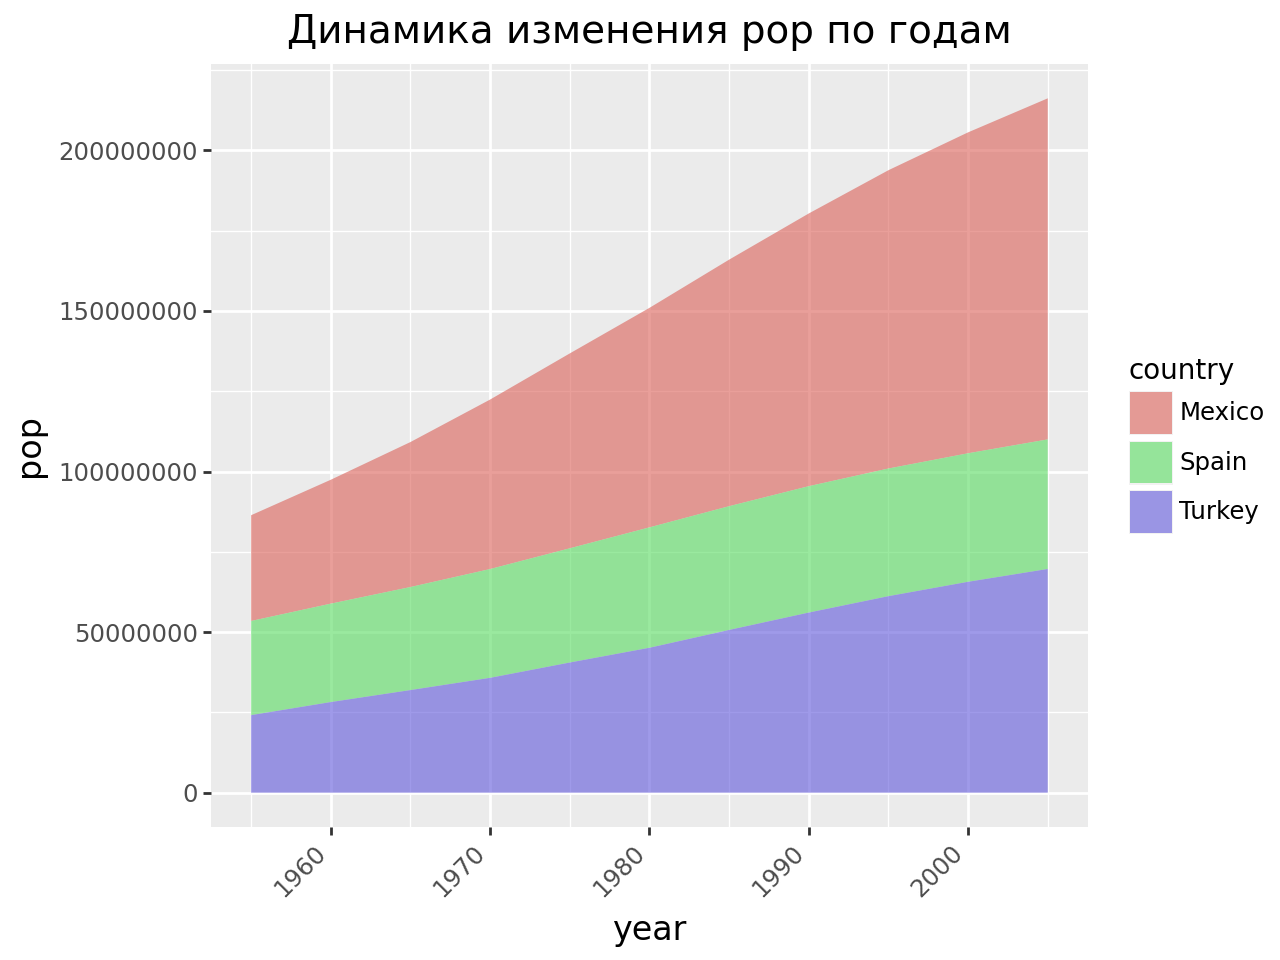

In [12]:
plot = (
    ggplot(data, aes(x='year', y='pop', fill='country')) +
    geom_area(alpha=0.6, position='stack') +
    labs(
        title='Динамика изменения pop по годам',
        x='year',
        y='pop',
    ) +
    theme(
        plot_title=element_text(size=14, ha='center'),
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        axis_text_x=element_text(rotation=45, hjust=1),
        legend_title=element_text(size=10),
        legend_position='right'
    )
)

print(plot)

C:\Users\Никита\AppData\Local\Temp\ipykernel_21144\2658768708.py:18: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


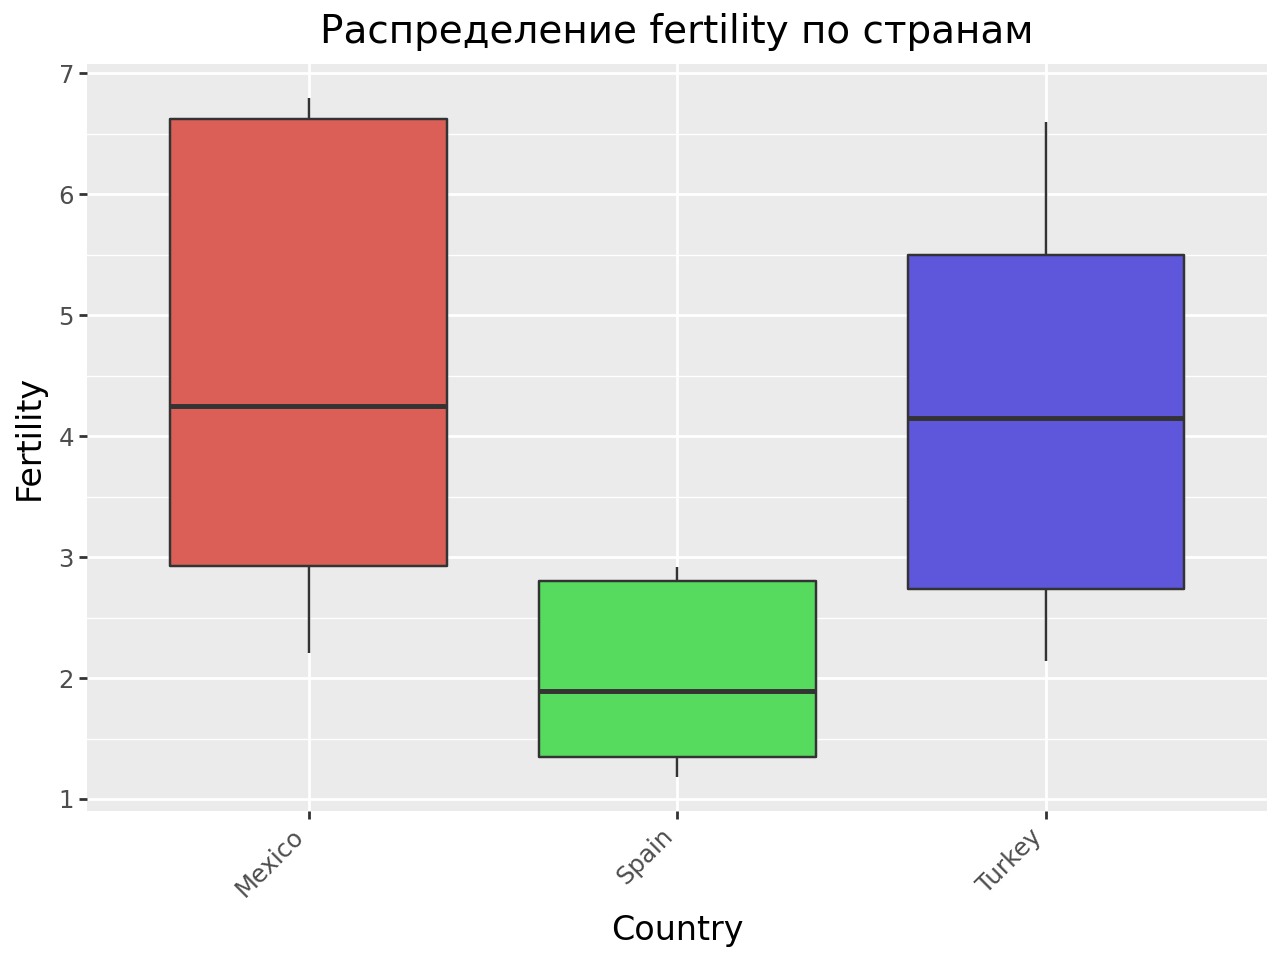

In [14]:
plot = (
    ggplot(data, aes(x='country', y='fertility', fill='country')) +
    geom_boxplot() +
    labs(
        title='Распределение fertility по странам',
        x='Country',
        y='Fertility'
    ) +
    theme(
        plot_title=element_text(size=14, ha='center'),
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        axis_text_x=element_text(rotation=45, hjust=1),
        legend_position='none'
    )
)

print(plot)

C:\Users\Никита\AppData\Local\Temp\ipykernel_21144\1819402953.py:18: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


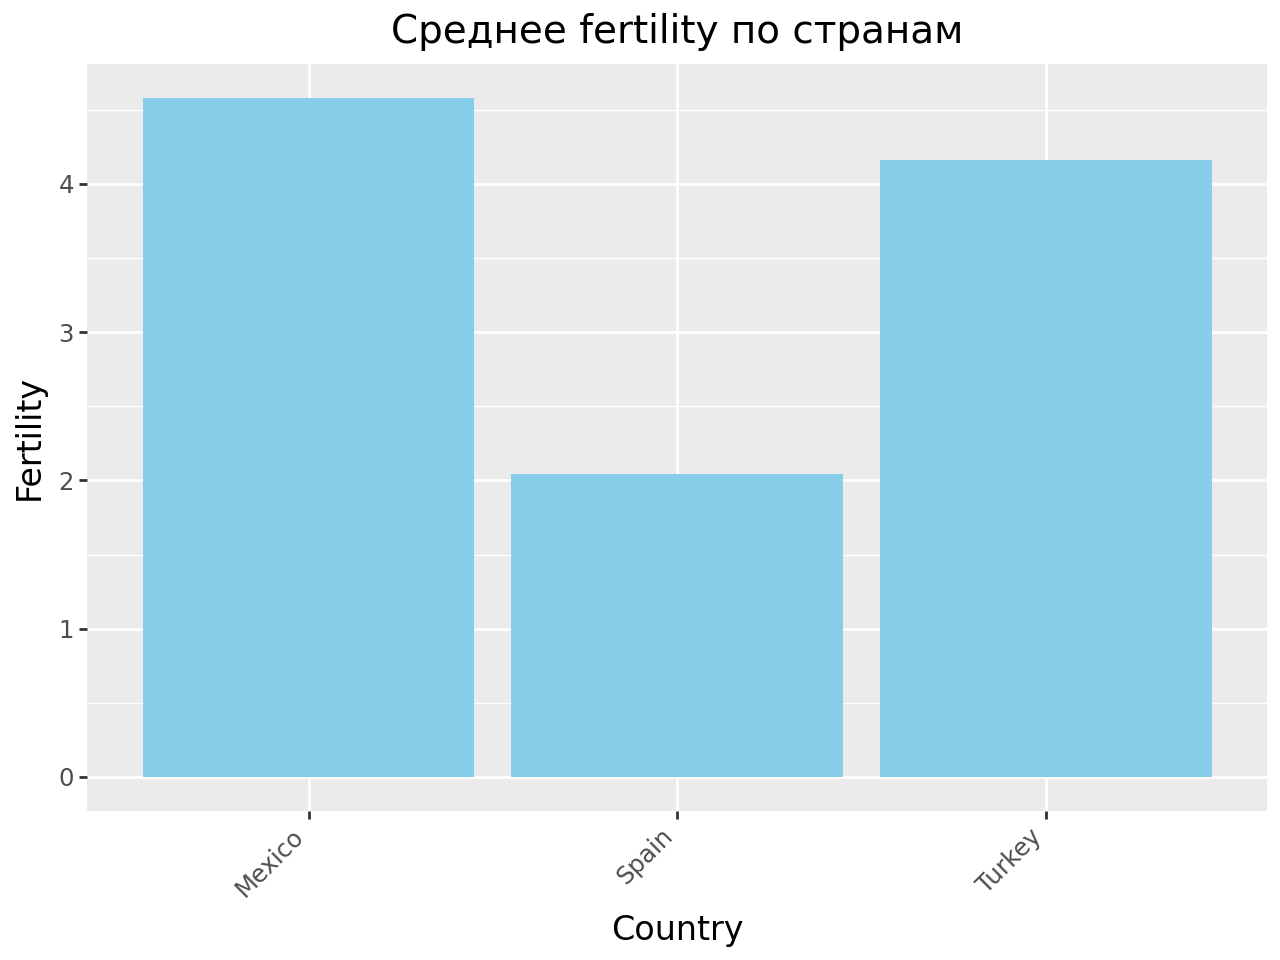

In [15]:
mean_fertility = data.groupby('country')['fertility'].mean().reset_index()
plot = (
    ggplot(mean_fertility, aes(x='country', y='fertility')) +
    geom_bar(stat='identity', fill='skyblue') +
    labs(
        title='Среднее fertility по странам',
        x='Country',
        y='Fertility'
    ) +
    theme(
        plot_title=element_text(size=14, ha='center'),
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        axis_text_x=element_text(rotation=45, hjust=1)
    )
)

print(plot)

C:\Users\Никита\AppData\Local\Temp\ipykernel_21144\670553085.py:19: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


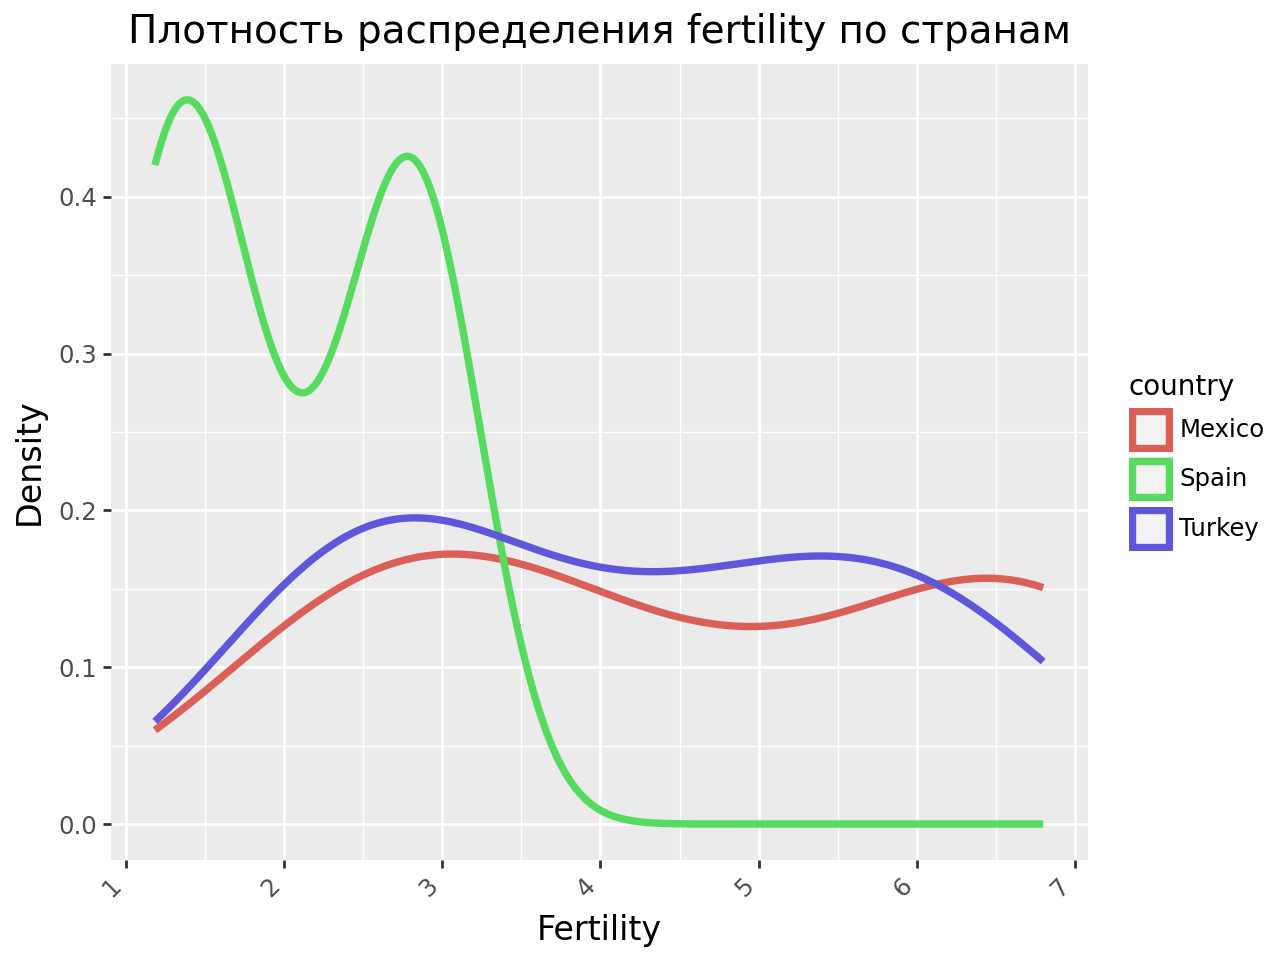

In [21]:
plot = (
    ggplot(data, aes(x='fertility', color='country')) + 
    geom_density(size=1.5) +  
    labs(
        title='Плотность распределения fertility по странам',
        x='Fertility',
        y='Density'
    ) +
    theme(
        plot_title=element_text(size=14, ha='center'),
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        axis_text_x=element_text(rotation=45, hjust=1),
        legend_title=element_text(size=10),
        legend_position='right'
    )
)

print(plot)